### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

<IPython.core.display.Javascript object>


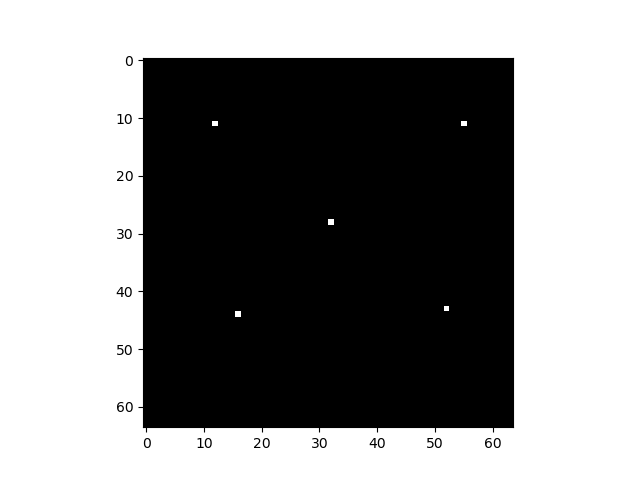

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from matplotlib import cm
import math

fig, ax = plt.subplots()

img = np.zeros((64,64), dtype=np.uint8)


ax.imshow(img, cmap=cm.gray )
lst=[]
def onclick(event):
    img[int(event.ydata),int(event.xdata)] = 1
    ax.imshow(img, cmap=cm.gray )

cid = fig.canvas.mpl_connect('button_press_event', onclick)

(-0.5, 200.5, 200.5, -0.5)

<Figure size 432x288 with 0 Axes>

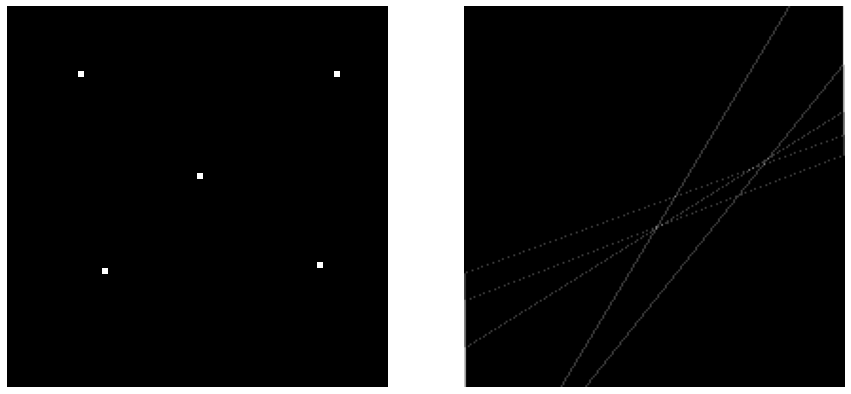

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

def hough_fun(image, aMin, aMax, aSkok, bMin, bMax, bSkok):
    i=aMin
    a = []
    while (i <= aMax):
        a.append(i)
        i += aSkok
        
    j=bMin
    b = []
    while (j <= bMax):
        b.append(j)
        j += bSkok
        
    aShape = len(a)
    bShape = len(b)
    
    H = np.zeros((aShape,bShape))
    Y,X = image.shape
    
    for x in range (X):
        for y in range (Y):
            for a_idx in range (aShape):
                aa = a[a_idx]
                if(image[y,x] == 1):
                    b_v = -aa*x + y
#                     b_idx = np.argmin(abs(b - b_v))
                    b_idx = np.argmin([abs(bs - b_v) for bs in b])
                    H[a_idx,b_idx] = H[a_idx, b_idx] + 1
    
    
    return H


# img = cv2.imread("kropki.png", cv2.IMREAD_GRAYSCALE)
img_h = hough_fun(img, aMin = -5, aMax = 5, aSkok = 0.05, bMin = -100, bMax = 100, bSkok = 1)


plt.gray()
f, tab = plt.subplots(1,2,figsize=(15,15))
tab[0].imshow(img)
tab[1].imshow(img_h)
tab[0].axis('off')
tab[1].axis('off')
